### Image Processing Project

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Load the mnist data set.This data set was obtained from Kaggle.com 

https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download

In [6]:
# Load the mnist data
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [7]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train_data.shape[0], train_data.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test_data.shape[0], test_data.shape[1]))

Training dataset has 60000 observations and 785 variables
Testing dataset has 10000 observations and 785 variables


### Load mnist data

In [8]:
# look at the first 5 rows
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Seperate the target(y) and independant(X) variables in the training data
X = train_data.iloc[:,1:]
y = train_data.iloc[:,0]

In [10]:
# Seperate the target(y) and independant(X) variables in the test data
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

Split the training data into an 80:20 split, where 20% will be used to test/ develop the model.

In [11]:
# Split the training data into train and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2,
random_state = 23 , stratify=y)

#  Look at shape of train and development data
print(X_train.shape)
print(X_dev.shape)

(48000, 784)
(12000, 784)


The purpose of the training data set is to train/fit the model.

The purpose of the development(test) data set is used see if the model is generalising well to unseen data and tune the model where necessary to fix overfitting or underfitting.

The purpose of the test(validation) set it to perform a final test on the model with unseen data after it has been tuned on the development data.

In [12]:

# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


**Note that n_estimators changed from 10 to 100  in sklearn version 0.22. Therefore all version higher than 0.22 will have n_estimators = 100**

### Create a random forest model

In [13]:
# Fit the random forest model to the training data
rfc = RandomForestClassifier(random_state =0, max_depth = None)
rfc.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [25]:
# Check model accuracy on development data
y_pred = rfc.predict(X_dev)
print("Accuracy:", accuracy_score(y_dev,y_pred))


Accuracy: 0.9688333333333333


**Note:** accuracy is usually higher when the tree is not pruned (max_depth not set) but it take too much memory

### Select parameter to tune

I will tune the **max depth** parameter because, if left on the default setting of *None*, it will lead to fully grown and unpruned trees which can potentially be very large on some data sets. The max depth parameter will also be tuned to reduce memory consumption, the complexity and size of the trees. 

### Plot line graphs of training and development accuracies

Using max depth values between 2 and 10

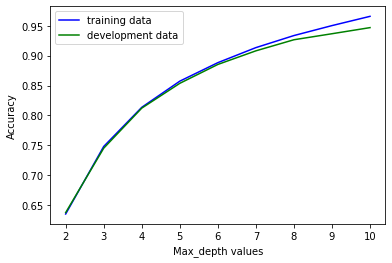

In [15]:
# looking at effect of tuning on model accuracy  

max_depths = range(2,11)
# Creat empty lists for the accuracy scores
tuned_scores_train = [] 
tuned_scores_dev = []

for d in max_depths:
  forest = RandomForestClassifier(max_depth=d, random_state=0)
  forest.fit(X_train, y_train)
  score = forest.score(X_train, y_train)
  score_1 = forest.score(X_dev, y_dev)
  
  # append the lists with the accuracy scores
  tuned_scores_train.append(score)
  tuned_scores_dev.append(score_1)
  
# Plot the line graphs for accuracy score and max depth  
label = ['training data', 'development data']
fig, ax = plt.subplots()
ax.plot(max_depths, tuned_scores_train, color='b')
ax.plot(max_depths, tuned_scores_dev, color= 'g')
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.legend(label)
ax.xaxis.set_ticks(max_depths)
plt.show()

### Parameter tuning on test data

The max depth selected will be 7 because that is where the accuracy lines start to diverge.

In [17]:
# Fit the random forest model to the training data and tune the max_depth parameter
rfc_tuned = RandomForestClassifier(random_state=0, max_depth=7)
rfc_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, random_state=0)

In [24]:
# Check model accuracy on the test data (validation data)
pred = rfc_tuned.predict(X_test)
print("Accuracy:", accuracy_score(y_test,pred))

Accuracy: 0.9152


### Confusion Matrix

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

print ("Confusion Matrix")
classes = list(['0','1','2','3','4','5','6','7','8','9'])
conf_mat = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)
cm_df

Confusion Matrix


,0,1,2,3,4,5,6,7,8,9
0,963,1,1,0,0,2,5,2,5,1
1,0,1116,3,2,0,1,4,1,8,0
2,9,8,935,14,13,2,15,20,12,4
3,7,4,20,909,2,17,0,16,23,12
4,2,3,2,0,861,2,15,2,14,81
5,14,12,1,39,14,761,19,6,12,14
6,19,5,1,0,13,9,902,0,9,0
7,2,15,29,2,9,0,0,918,7,46
8,5,11,9,21,12,9,12,5,865,25
9,7,7,3,13,26,7,2,9,13,922


The model struggles with recognising 5 and 4 the most

### Classification Report

In [23]:
print ("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.94      0.98      0.96      1135
           2       0.93      0.91      0.92      1032
           3       0.91      0.90      0.90      1010
           4       0.91      0.88      0.89       982
           5       0.94      0.85      0.89       892
           6       0.93      0.94      0.93       958
           7       0.94      0.89      0.91      1028
           8       0.89      0.89      0.89       974
           9       0.83      0.91      0.87      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000

